In [23]:
! pip install pilmoji
! pip install imageio-ffmpeg base64

ERROR: Could not find a version that satisfies the requirement base64 (from versions: none)
ERROR: No matching distribution found for base64


In [1]:
import numpy as np
import IPython

In [2]:
with open("emoji.txt",encoding="utf8") as f:
    emojis = f.read().splitlines()

In [3]:
emojis = ['🟩'] + emojis

In [4]:
grid = np.random.randint(0,len(emojis),(10,10))
r,c=grid.shape

In [5]:
npemojis = np.array(emojis)
npemojis

array(['🟩', '🥑', '🍆', '🥔', '🥕', '🌽', '🌶️', '🥒', '🥬', '🥦', '🧄', '🧅', '🍄',
       '🥜', '🌰'], dtype='<U2')

In [6]:
s = "\n".join([" ".join(npemojis[grid[i,:]].flat) for i in range(c)])

In [7]:
print(s)

🧄 🥜 🧄 🧅 🌽 🥦 🥦 🌰 🧅 🥔
🥦 🍄 🧅 🥑 🥬 🥕 🧄 🧄 🥬 🥔
🥜 🥒 🧅 🍄 🧄 🥒 🧅 🥦 🥒 🧅
🌶️ 🥒 🥜 🥑 🍆 🥕 🥒 🥒 🥔 🌶️
🥒 🥔 🍆 🧅 🍆 🟩 🧅 🥕 🥑 🌰
🥬 🥒 🥜 🥔 🥜 🥒 🌶️ 🥕 🥑 🥑
🧄 🍄 🥜 🥒 🥒 🥔 🥦 🌰 🍆 🌰
🟩 🌽 🌶️ 🥬 🥦 🥦 🌰 🥒 🥜 🟩
🥔 🌰 🥕 🌶️ 🥔 🥕 🟩 🧄 🍄 🥬
🥜 🌶️ 🌽 🥜 🧄 🥔 🥑 🌶️ 🧄 🌶️


In [8]:
import matplotlib.pyplot as plt

In [9]:
from pathlib import Path

In [18]:
path_font = r"symbola/Symbola.ttf"
path_font = r"seguiemj/seguiemj.ttf"
# path_font = r"NotoColorEmoji\NotoColorEmoji.ttf"

Path(path_font).exists(),Path(path_font).resolve()

(True,
 PosixPath('/home/maxime/code/mcaox/iarchitect/iarchitect/render/seguiemj/seguiemj.ttf'))

In [19]:
string_unic = "\U0001f951"
emojibasic='😀'

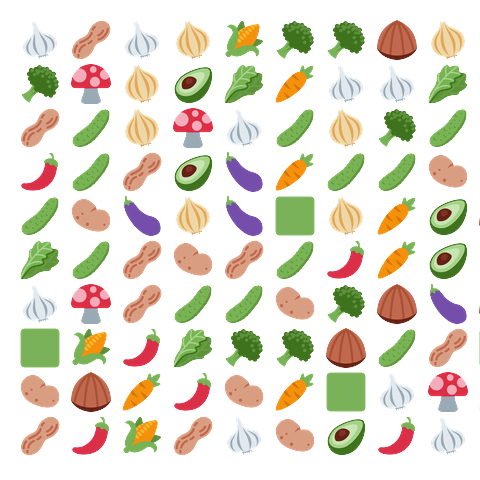

In [21]:
from PIL import Image, ImageDraw, ImageFont
from pilmoji import Pilmoji

def image_from_grid(grid,path_font=r"seguiemj/seguiemj.ttf",npemojis=npemojis):
    r = grid.shape[0]
    s = "\n".join([" ".join(npemojis[grid[i,:]].flat) for i in range(r)])
    size_fnt = 40
    size_im = (np.array(grid.shape) * 40 * 1.2).astype(int)
    im = Image.new("RGBA", tuple(size_im), (255, 255, 255, 0))
    fnt = ImageFont.truetype(path_font, 40)
    # fnt = ImageFont.truetype("arial.ttf", 15)

    with Pilmoji(im) as pilmoj:
        pilmoj.text((20,20),s, font=fnt, fill=(0, 0, 0),embedded_color=True)


    # d = ImageDraw.Draw(im)
    # d.multiline_text((10, 10), string_unic, font=fnt, fill=(0, 0, 0),embedded_color=True)
    
    return im


im = image_from_grid(grid)
im

In [22]:
def images_generator(n,as_array=False):
    for _ in range(n):
        grid = np.random.randint(0,len(emojis),(10,10))
        im = image_from_grid(grid)
        if as_array:
            yield np.array(im)
        else:
            yield im
            
            
def images_generator2(as_array=False):
    grid = np.zeros((6,5),dtype=int)
    im = image_from_grid(grid) 
    if as_array:
        yield np.array(im)
    else:
        yield im  
    while (grid==0).sum()>0:
        new = np.random.randint(0,len(emojis))
        r,c = np.where(grid==0)
        i = np.random.randint(0,len(r))
        grid[r[i],c[i]] = new    
        im = image_from_grid(grid)
        if as_array:
            yield np.array(im)
        else:
            yield im  

In [24]:
import imageio
import base64

# All images must be of the same size
def create_video(filename,generator_,**kwargs):
    kwargs.setdefault("format",'FFMPEG')
    kwargs.setdefault("mode",'I')
    kwargs.setdefault("fps",1)
#     kwargs.setdefault("codec",'h264_vaapi')
#     kwargs.setdefault("output_params",['-vaapi_device',
#                                       '/dev/dri/renderD128',
#                                       '-vf',
#                                       'format=gray|nv12,hwupload'])
#     kwargs.setdefault("pixelformat",'vaapi_vld')
    with imageio.get_writer(filename,**kwargs) as w:
        for im in generator_:
            w.append_data(im)
            
def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())

    return IPython.display.HTML(tag)

In [25]:
create_video("test_video.mp4",images_generator(10,as_array=True))

In [26]:
embed_mp4("test_video.mp4")

In [27]:
create_video("test_video2.mp4",images_generator2(as_array=True))

In [28]:
embed_mp4("test_video2.mp4")